## Load the data



In [ ]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Redback_B/cardio_data_processed.csv')

In [ ]:
df.shape # examine the shape and determine its rank

(68205, 17)

In [ ]:
# Show data types and number of null values for each variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [ ]:
df = df.drop(["id", "age", "bp_category"], axis=1)
# drop less meaningful variables

In [ ]:
#df = df.drop(["smoke", "active", "gender", "alco", "active", "gluc"], axis=1)
# drop less meaningful variables

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# separate features and labels
x = df.drop('cardio', axis=1)
y = df['cardio']

# split the data into training, validation, and test sets
x_train, x_val_test, y_train, y_val_test = train_test_split(x, y, test_size=0.4, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_val_test, y_val_test, test_size=0.5, random_state=42)

# Now I will use x_train, x_test, x_val and y_train, y_test, y_val

In [ ]:
df.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'cardio', 'age_years', 'bmi',
       'bp_category_encoded'],
      dtype='object')

In [ ]:
# Convert categorical columns using one-hot encoding
categorical_columns = ['bp_category_encoded']
X_train = pd.get_dummies(x_train, columns=categorical_columns)
X_test = pd.get_dummies(x_test, columns=categorical_columns)
X_val = pd.get_dummies(x_val, columns=categorical_columns)

# Normalize numerical columns
numeric_columns = ['height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']
scaler = StandardScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])
X_val[numeric_columns] = scaler.transform(X_val[numeric_columns])

In [ ]:
X_val.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category_encoded_Elevated,bp_category_encoded_Hypertension Stage 1,bp_category_encoded_Hypertension Stage 2,bp_category_encoded_Normal
23361,2,1.926064,-0.288504,-0.407940,-0.140589,1,1,1,0,0,1.349353,-1.012807,0,1,0,0
46102,1,-0.900742,-1.406501,-0.407940,-0.140589,1,1,0,0,1,1.497021,-0.961062,0,1,0,0
32906,1,0.451209,-0.358379,-0.407940,-0.140589,2,2,0,0,1,-0.570336,-0.526831,0,1,0,0
39424,1,0.451209,-0.288504,-0.407940,-0.140589,1,1,0,0,1,-1.751683,-0.466252,0,1,0,0
40737,2,-0.286219,0.060870,0.216254,-0.140589,2,1,1,0,1,0.315674,0.179422,0,1,0,0


In [ ]:
print(f'Shape of my datasets are: {X_train.shape}, {X_test.shape} and {X_val.shape}.')

Shape of my datasets are: (40923, 16), (13641, 16) and (13641, 16).


In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models, layers, optimizers, utils

# Set Python random seed
np.random.seed(42)
# Set TensorFlow random seed
tf.random.set_seed(42)

# Set input_shape as (16,) based on the number of features in X_train
input_shape = (16,)

'''model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])'''

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(1, activation='sigmoid', kernel_initializer='he_normal')
])

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 64)                1088      
                                                                 
 dense_37 (Dense)            (None, 64)                4160      
                                                                 
 dense_38 (Dense)            (None, 32)                2080      
                                                                 
 dense_39 (Dense)            (None, 32)                1056      
                                                                 
 dense_40 (Dense)            (None, 16)                528       
                                                                 
 dense_41 (Dense)            (None, 1)                 17        
                                                                 
Total params: 8929 (34.88 KB)
Trainable params: 8929 (

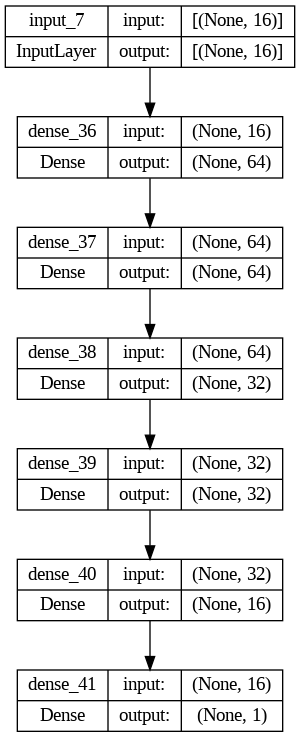

In [ ]:
# plot my model
utils.plot_model(model=model,  # provide the model to be plotted
                 to_file='model_plot_Binary_Classification.png', # name of the file to be saved as
                 show_shapes=True, # whether to display shape information
                 show_layer_names=True, # whether to display layer names
                 rankdir='TB', # TB creates a vertical plot; LR creates a horizontal plot
                 expand_nested=True) # recursively expand nested models

In [ ]:
print(f'Shape of my datasets are: {X_train.shape}, {X_test.shape} and {X_val.shape}.')

Shape of my datasets are: (40923, 16), (13641, 16) and (13641, 16).


## Fitting the model

In [ ]:
# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [ ]:
# save the initial weights for later experiments
init_weights = model.get_weights()

In [ ]:
# Train the model
history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=16,
                    validation_data=(X_val, y_val))

Epoch 1/20
2558/2558 [==============================] - 16s 6ms/step - loss: 0.5575 - accuracy: 0.7240 - val_loss: 0.5562 - val_accuracy: 0.7269
Epoch 2/20
2558/2558 [==============================] - 14s 5ms/step - loss: 0.5466 - accuracy: 0.7319 - val_loss: 0.5535 - val_accuracy: 0.7266
Epoch 3/20
2558/2558 [==============================] - 14s 5ms/step - loss: 0.5439 - accuracy: 0.7337 - val_loss: 0.5563 - val_accuracy: 0.7290
Epoch 4/20
2558/2558 [==============================] - 14s 5ms/step - loss: 0.5430 - accuracy: 0.7321 - val_loss: 0.5528 - val_accuracy: 0.7295
Epoch 5/20
2558/2558 [==============================] - 13s 5ms/step - loss: 0.5410 - accuracy: 0.7337 - val_loss: 0.5543 - val_accuracy: 0.7242
Epoch 6/20
2558/2558 [==============================] - 14s 6ms/step - loss: 0.5406 - accuracy: 0.7356 - val_loss: 0.5509 - val_accuracy: 0.7290
Epoch 7/20
2558/2558 [==============================] - 16s 6ms/step - loss: 0.5400 - accuracy: 0.7381 - val_loss: 0.5516 - val_ac

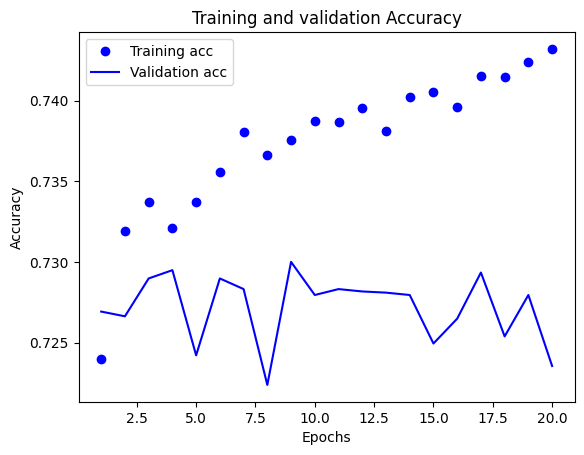

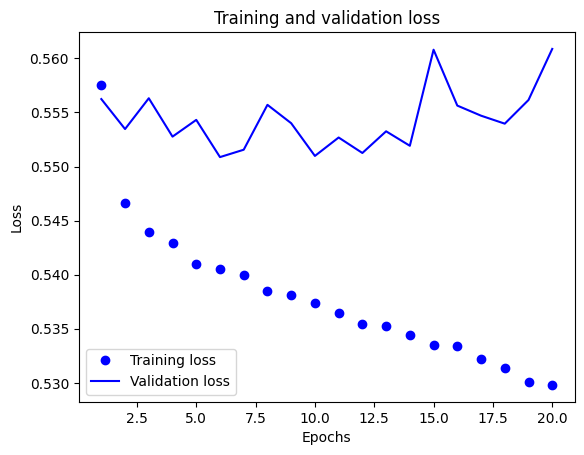

427/427 [==============================] - 2s 4ms/step - loss: 0.5563 - accuracy: 0.7249


[0.5562540888786316, 0.7249468564987183]

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training acc')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model
results = model.evaluate(X_test, y_test)
results

## Improve the model

In [ ]:
!rm -rf ./logs/

from datetime import datetime
import os

root_logdir = "logs" # Root log directory
run_id = datetime.now().strftime("%Y%m%d-%H%M%S")
logdir = os.path.join(root_logdir, run_id) # Directory of the log files

callbacks = [
    tf.keras.callbacks.TensorBoard(
        log_dir=logdir, # Directory where the log files will be written
        histogram_freq=1 # How often to compute activation and weight histograms (1 epoch)
    ) # Callback that streams epoch results to TensorBoard.
]


# reset the training
model.set_weights(init_weights) # Reset the weights of the network to the initial weights


history = model.fit(
                    X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    callbacks=callbacks
                    )


Epoch 1/10
1279/1279 [==============================] - 7s 6ms/step - loss: 0.5582 - accuracy: 0.7211
Epoch 2/10
1279/1279 [==============================] - 6s 4ms/step - loss: 0.5469 - accuracy: 0.7299
Epoch 3/10
1279/1279 [==============================] - 7s 5ms/step - loss: 0.5439 - accuracy: 0.7332
Epoch 4/10
1279/1279 [==============================] - 6s 5ms/step - loss: 0.5429 - accuracy: 0.7336
Epoch 5/10
1279/1279 [==============================] - 6s 4ms/step - loss: 0.5404 - accuracy: 0.7351
Epoch 6/10
1279/1279 [==============================] - 7s 6ms/step - loss: 0.5403 - accuracy: 0.7353
Epoch 7/10
1279/1279 [==============================] - 6s 4ms/step - loss: 0.5394 - accuracy: 0.7371
Epoch 8/10
1279/1279 [==============================] - 7s 5ms/step - loss: 0.5384 - accuracy: 0.7364
Epoch 9/10
1279/1279 [==============================] - 6s 5ms/step - loss: 0.5376 - accuracy: 0.7366
Epoch 10/10
1279/1279 [==============================] - 5s 4ms/step - loss: 0.537

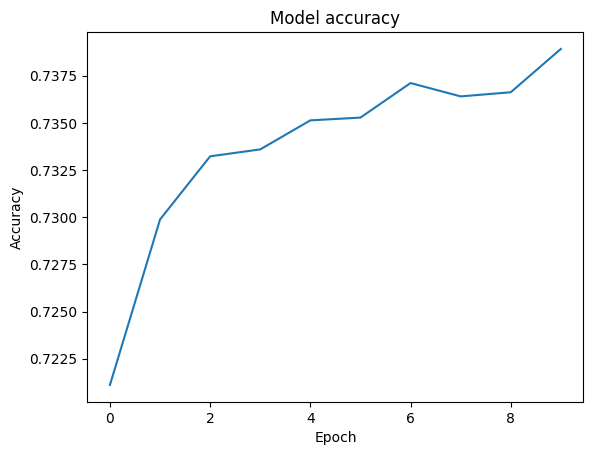

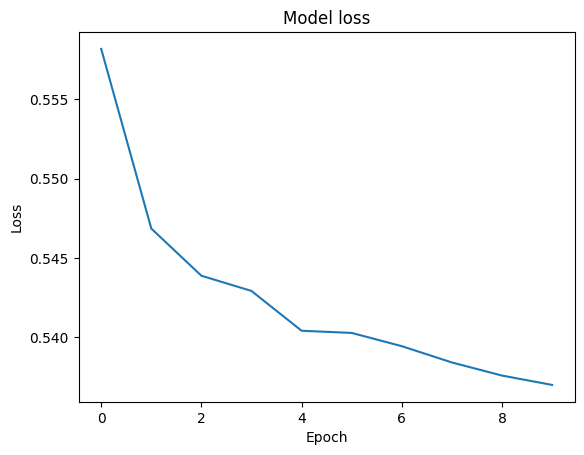

In [ ]:
import matplotlib.pyplot as plt # Import matplotlib.pyplot for plotting

# Plot training accuracy values
plt.plot(history.history['accuracy']) # Plot the training accuracy
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot training loss values
plt.plot(history.history['loss']) # Plot the training loss
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()


## Apply regularisation


In [ ]:
model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid', kernel_initializer='he_normal')
])

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Epoch 1/10
1279/1279 [==============================] - 8s 6ms/step - loss: 0.7604 - accuracy: 0.5616 - val_loss: 0.6522 - val_accuracy: 0.6145
Epoch 2/10
1279/1279 [==============================] - 9s 7ms/step - loss: 0.6330 - accuracy: 0.6736 - val_loss: 0.6144 - val_accuracy: 0.6634
Epoch 3/10
1279/1279 [==============================] - 7s 5ms/step - loss: 0.6144 - accuracy: 0.6977 - val_loss: 0.6078 - val_accuracy: 0.6945
Epoch 4/10
1279/1279 [==============================] - 8s 6ms/step - loss: 0.6015 - accuracy: 0.7077 - val_loss: 0.5817 - val_accuracy: 0.7148
Epoch 5/10
1279/1279 [==============================] - 7s 5ms/step - loss: 0.6018 - accuracy: 0.7089 - val_loss: 0.5684 - val_accuracy: 0.7255
Epoch 6/10
1279/1279 [==============================] - 8s 7ms/step - loss: 0.6036 - accuracy: 0.7081 - val_loss: 0.5672 - val_accuracy: 0.7229
Epoch 7/10
1279/1279 [==============================] - 7s 5ms/step - loss: 0.6033 - accuracy: 0.7091 - val_loss: 0.5901 - val_accuracy:

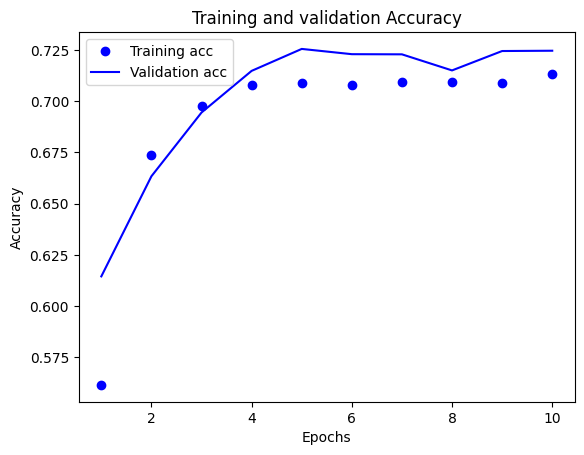

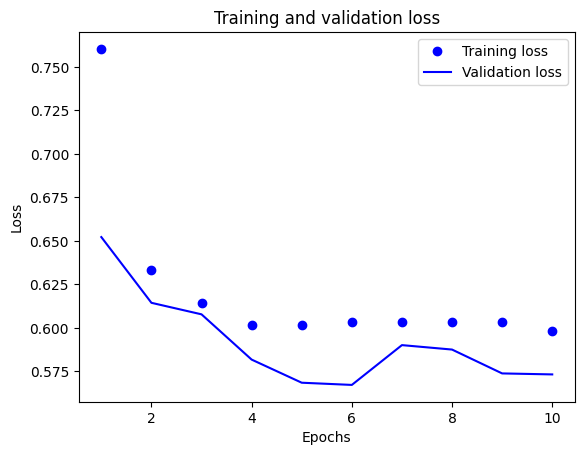

427/427 [==============================] - 1s 2ms/step - loss: 0.5670 - accuracy: 0.7310


[0.5670191049575806, 0.7310314774513245]

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)


plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Evaluate the model
results = model.evaluate(X_test, y_test)
results